,Start_Time,End_Time,Electricity_production_Finland,Year,Month,Day
0,2014-01-01 00:00:00+00:00,2014-01-01T01:00:00.000Z,7306.0,2014,1,1
1,2014-01-01 01:00:00+00:00,2014-01-01T02:00:00.000Z,7264.0,2014,1,1
2,2014-01-01 02:00:00+00:00,2014-01-01T03:00:00.000Z,7231.0,2014,1,1
3,2014-01-01 03:00:00+00:00,2014-01-01T04:00:00.000Z,7270.0,2014,1,1
4,2014-01-01 04:00:00+00:00,2014-01-01T05:00:00.000Z,7339.0,2014,1,1
...,...,...,...,...,...,...
140070,2025-02-11 20:45:00+00:00,2025-02-11T21:00:00.000Z,11187.5,2025,2,11
140071,2025-02-11 21:00:00+00:00,2025-02-11T21:15:00.000Z,11161.6,2025,2,11
140072,2025-02-11 21:15:00+00:00,2025-02-11T21:30:00.000Z,11186.9,2025,2,11
140073,2025-02-11 21:30:00+00:00,2025-02-11T21:45:00.000Z,11125.0,2025,2,11


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 12 artists>

Text(0.5, 1.0, 'Monthly Electricity Production (Mean ± Std)')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Electricity Production')

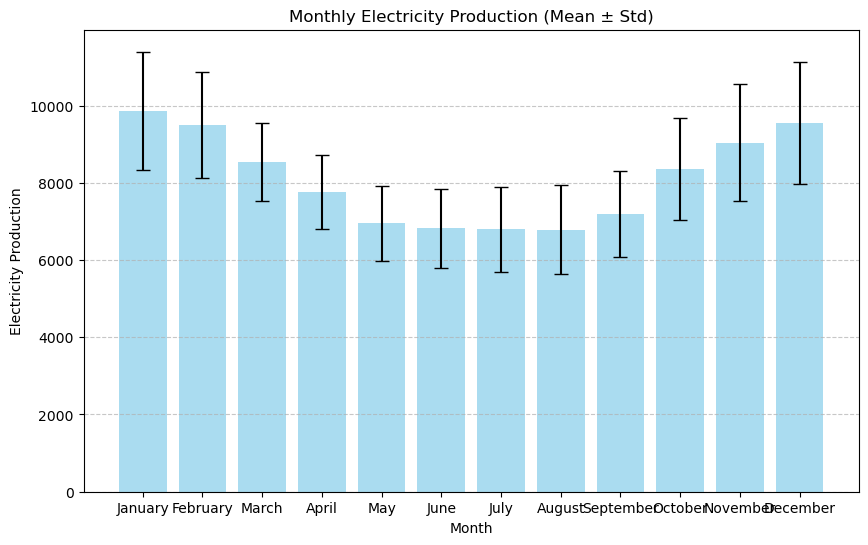

In [27]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# data_file = "Electricity_Production_Finland_1914_2025_trim.csv"
data_file = "Datasets/Electricity_Production_Finland_By_FinGrid.csv"
# data_file = "/kaggle/input/finland-electricity-production/Electricity_Production_Finland_1980-01-01T0000_2025-02-12T0000.csv"


df = pd.read_csv(data_file)
df_data = pd.DataFrame(df)



df_data['Start_Time'] = pd.to_datetime(df_data['Start_Time'])
df_data['Year'] =  df_data['Start_Time'].dt.year
df_data['Month'] =  df_data['Start_Time'].dt.month
df_data['Day'] =  df_data['Start_Time'].dt.day
df_data




monthly_stats = df_data.groupby('Month')['Electricity_production_Finland'].agg(['mean', 'std']).reset_index()

# Rename the Month column to month names for better readability
monthly_stats['Month'] = monthly_stats['Month'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})



plt.figure(figsize=(10, 6))
plt.bar(monthly_stats['Month'], monthly_stats['mean'], yerr=monthly_stats['std'], capsize=5, color='skyblue', alpha=0.7)
plt.title('Monthly Electricity Production (Mean ± Std)')
plt.xlabel('Month')
plt.ylabel('Electricity Production')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Daily Electricity Production (Mean ± Std)')

Text(0.5, 0, 'Day of the Year')

Text(0, 0.5, 'Electricity Production')

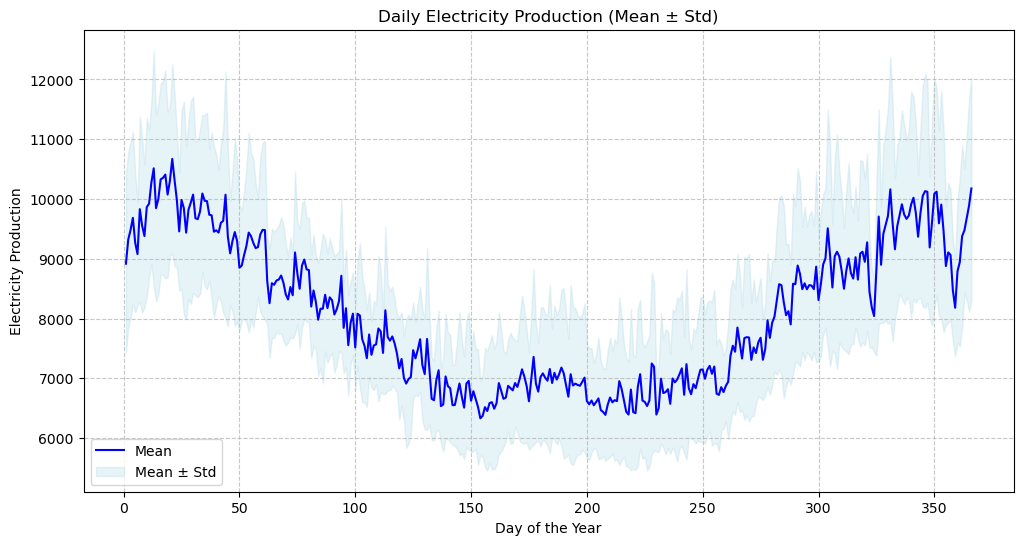

In [29]:
plt.figure(figsize=(12, 6))
# Add a 'DayOfYear' column to group by day of year
df_data['DayOfYear'] = df_data['Start_Time'].dt.dayofyear

# Compute mean and std of electricity production per day of the year
daily_stats = df_data.groupby('DayOfYear')['Electricity_production_Finland'].agg(['mean', 'std']).reset_index()

plt.plot(daily_stats['DayOfYear'], daily_stats['mean'], label='Mean', color='blue')
plt.fill_between(
    daily_stats['DayOfYear'],
    daily_stats['mean'] - daily_stats['std'],
    daily_stats['mean'] + daily_stats['std'],
    color='lightblue',
    alpha=0.3,
    label='Mean ± Std'
)
plt.title('Daily Electricity Production (Mean ± Std)')
plt.xlabel('Day of the Year')
plt.ylabel('Electricity Production')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()